## Objective: To predict the Loan status for new customers that are present in test data using any machine learning algorithm which gives higher accuracy for prediction.

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Collection

In [2]:
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [3]:
print('the shape of train is: ', train.shape)
print('the shape of test is: ', test.shape)

the shape of train is:  (614, 13)
the shape of test is:  (367, 12)


In [4]:
train.head()

,ID,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Area_of_Property,Loan_Status
0,1,5849,0.0,NaN,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,2,4583,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3,3000,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,4,2583,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,5,6000,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y


In [5]:
test.head()

,ID,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Area_of_Property
0,1,5720,0,110.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
1,2,3076,1500,126.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban
2,3,5000,1800,208.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban
3,4,2340,2546,100.0,360.0,NaN,Male,Yes,2,Graduate,No,Urban
4,5,3276,0,78.0,360.0,1.0,Male,No,0,Not Graduate,No,Urban


## 2. Data Preprocessing & Analysis

### 1. Checking Missing Values

In [6]:
train.isnull().mean().sort_values(ascending= False) 

# This shows that 6 columns are having missing values in both train and test set.

Credit_History               0.081433
IS_Self_Employed             0.052117
Loan_Amount_Requirement      0.035831
No_of_Dependents             0.024430
Loan_Amount_Term             0.022801
Gender                       0.021173
Is_Married                   0.004886
Loan_Status                  0.000000
Area_of_Property             0.000000
Level_of_Education           0.000000
Income_of_Joint_Applicant    0.000000
Income_of_Applicant          0.000000
ID                           0.000000
dtype: float64

In [7]:
test.isnull().mean().sort_values(ascending= False)

Credit_History               0.079019
IS_Self_Employed             0.062670
Gender                       0.029973
No_of_Dependents             0.027248
Loan_Amount_Term             0.016349
Loan_Amount_Requirement      0.013624
Area_of_Property             0.000000
Level_of_Education           0.000000
Is_Married                   0.000000
Income_of_Joint_Applicant    0.000000
Income_of_Applicant          0.000000
ID                           0.000000
dtype: float64

### 2. Data Overview

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
ID                           614 non-null int64
Income_of_Applicant          614 non-null int64
Income_of_Joint_Applicant    614 non-null float64
Loan_Amount_Requirement      592 non-null float64
Loan_Amount_Term             600 non-null float64
Credit_History               564 non-null float64
Gender                       601 non-null object
Is_Married                   611 non-null object
No_of_Dependents             599 non-null object
Level_of_Education           614 non-null object
IS_Self_Employed             582 non-null object
Area_of_Property             614 non-null object
Loan_Status                  614 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [9]:
train.describe()

,ID,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,307.500000,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,177.390811,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,1.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,154.250000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,307.500000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,460.750000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,614.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.columns

Index(['ID', 'Income_of_Applicant', 'Income_of_Joint_Applicant',
       'Loan_Amount_Requirement', 'Loan_Amount_Term', 'Credit_History',
       'Gender', 'Is_Married', 'No_of_Dependents', 'Level_of_Education',
       'IS_Self_Employed', 'Area_of_Property', 'Loan_Status'],
      dtype='object')

In [11]:
test.columns

Index(['ID', 'Income_of_Applicant', 'Income_of_Joint_Applicant',
       'Loan_Amount_Requirement', 'Loan_Amount_Term', 'Credit_History',
       'Gender', 'Is_Married', 'No_of_Dependents', 'Level_of_Education',
       'IS_Self_Employed', 'Area_of_Property'],
      dtype='object')

### Observations: 

#### We can see there are total 13 columns including target variable, all of them are self explanatory. 

#### We also see some percentage of missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns.



In [12]:
train = train.drop(columns=['ID']) ## Dropping Loan ID column as here it is of no use.

### 3. Data Visualization for categoric variable

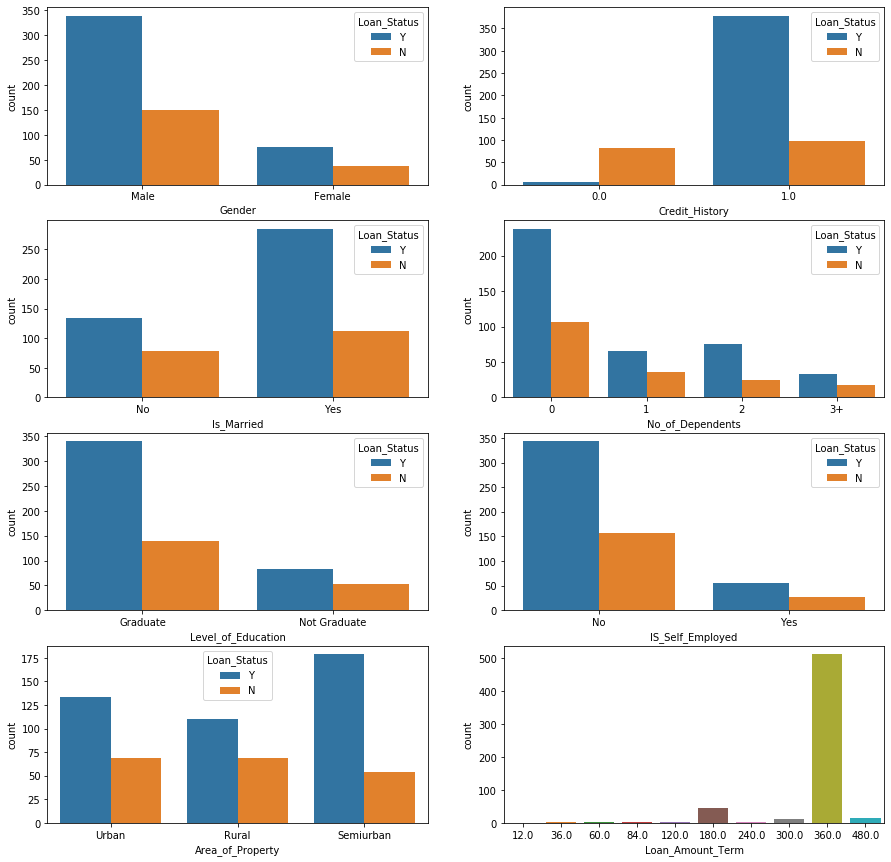

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.countplot(train['Gender'], hue = train['Loan_Status'])
plt.subplot(4,2,2)
sns.countplot(train['Credit_History'], hue = train['Loan_Status'])
plt.subplot(4,2,3)
sns.countplot(train['Is_Married'], hue = train['Loan_Status'])
plt.subplot(4,2,4)
sns.countplot(train['No_of_Dependents'], hue = train['Loan_Status'])
plt.subplot(4,2,5)
sns.countplot(train['Level_of_Education'], hue = train['Loan_Status'])
plt.subplot(4,2,6)
sns.countplot(train['IS_Self_Employed'], hue = train['Loan_Status'])
plt.subplot(4,2,7)
sns.countplot(train['Area_of_Property'], hue = train['Loan_Status'])
plt.subplot(4,2,8)
sns.countplot(train['Loan_Amount_Term'])

Y    422
N    192
Name: Loan_Status, dtype: int64


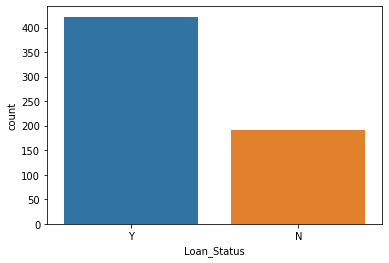

In [14]:
sns.countplot(train['Loan_Status'])
print(train['Loan_Status'].value_counts())

## Observations

#### 1. Loan_Status : Around 31% of people do not granted loan while 69% has been granted loan. Its not an imbalanced dataset so no need to balance it.
#### 2. Gender: Number of males are higher in Loan Process.
#### 3. Credit_History: Application with good credit history are highly accepted for loan
#### 4. Is_Married: Most pf the population is married and also those who are married have high chances of loan acceptance
#### 5. No_of_Dependents: Majority of the population have zero dependant and they are likey to have higher acceptance
#### 6. Level_of_Education: Around 79% percent of the population is graduate and have higher acceptance for loan.
#### 7. IS_Self_Employed: Around 87% percent of the population is not self employed.
#### 8. Area_of_Property: More applicants from Semi-urban and also likely to be granted loans.
#### 9. Loan_Amount_Term: Most of the loans taken are for 360 months.



### 4. Data Visualization for numeric variables

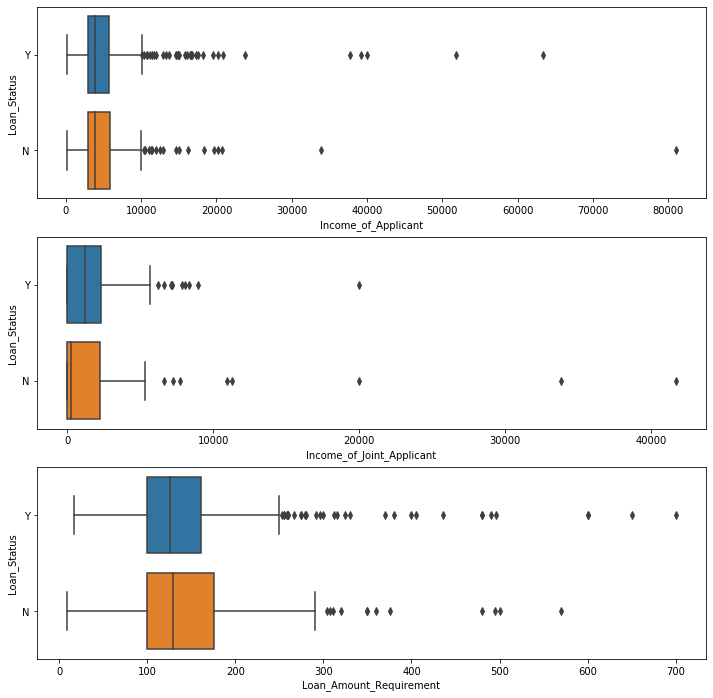

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(train['Income_of_Applicant'], train['Loan_Status'])
plt.subplot(3,1,2)
sns.boxplot(train['Income_of_Joint_Applicant'], train['Loan_Status'])
plt.subplot(3,1,3)
sns.boxplot(train['Loan_Amount_Requirement'], train['Loan_Status'])

# Observations

#### 1. Here we have found that some points are outlier but we are not removing it as they are useful data and removing it can cause loss of information.

#### 2. Income can have higher values.

#### 3. Instead we are using machine learning algorithms that are not sensitive to outliers like XGBoost and Random Forest .


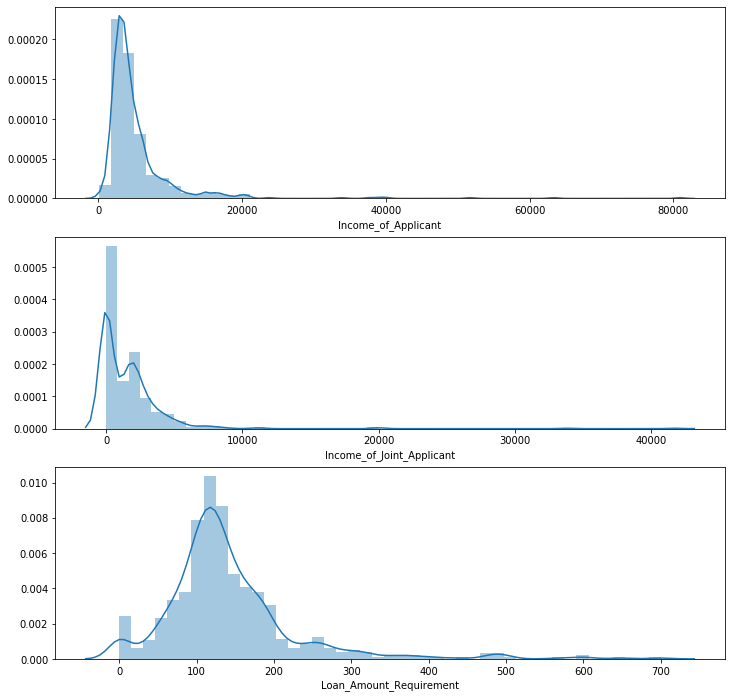

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.distplot(train['Income_of_Applicant'].fillna(0))
plt.subplot(3,1,2)
sns.distplot(train['Income_of_Joint_Applicant'].fillna(0))
plt.subplot(3,1,3)
sns.distplot(train['Loan_Amount_Requirement'].fillna(0))

### 5. Feature Encoding:

#### Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:


#### 1. Encoding Categorical Features.

In [17]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train,drop_first=True)
train_df_encoded.head()

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender_Male,Is_Married_Yes,No_of_Dependents_1,No_of_Dependents_2,No_of_Dependents_3+,Level_of_Education_Not Graduate,IS_Self_Employed_Yes,Area_of_Property_Semiurban,Area_of_Property_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [18]:
test_df_encoded = pd.get_dummies(test.drop('ID', axis=1),drop_first=True)
test_df_encoded.head()

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender_Male,Is_Married_Yes,No_of_Dependents_1,No_of_Dependents_2,No_of_Dependents_3+,Level_of_Education_Not Graduate,IS_Self_Employed_Yes,Area_of_Property_Semiurban,Area_of_Property_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [19]:
##Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

## Splitting into Train -Test Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [20]:
train_df_encoded.isnull().sum()

Income_of_Applicant                 0
Income_of_Joint_Applicant           0
Loan_Amount_Requirement            22
Loan_Amount_Term                   14
Credit_History                     50
Gender_Male                         0
Is_Married_Yes                      0
No_of_Dependents_1                  0
No_of_Dependents_2                  0
No_of_Dependents_3+                 0
Level_of_Education_Not Graduate     0
IS_Self_Employed_Yes                0
Area_of_Property_Semiurban          0
Area_of_Property_Urban              0
Loan_Status_Y                       0
dtype: int64

#### 2. Imputing missing values using Simple Imputer

In [21]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train_imp = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)
test_imp = imp_train.transform(test_df_encoded)

# Explanation:

#### 1. Here we are using Simple Imputer to handle missing values and we are using mean to fill missing values.

#### 2. In some features like 'Credit_History' it is putting mean of 0 and 1 and there we can use one approach that is 'Capturing NAN values with some other value' that results in increasing the model's performance.

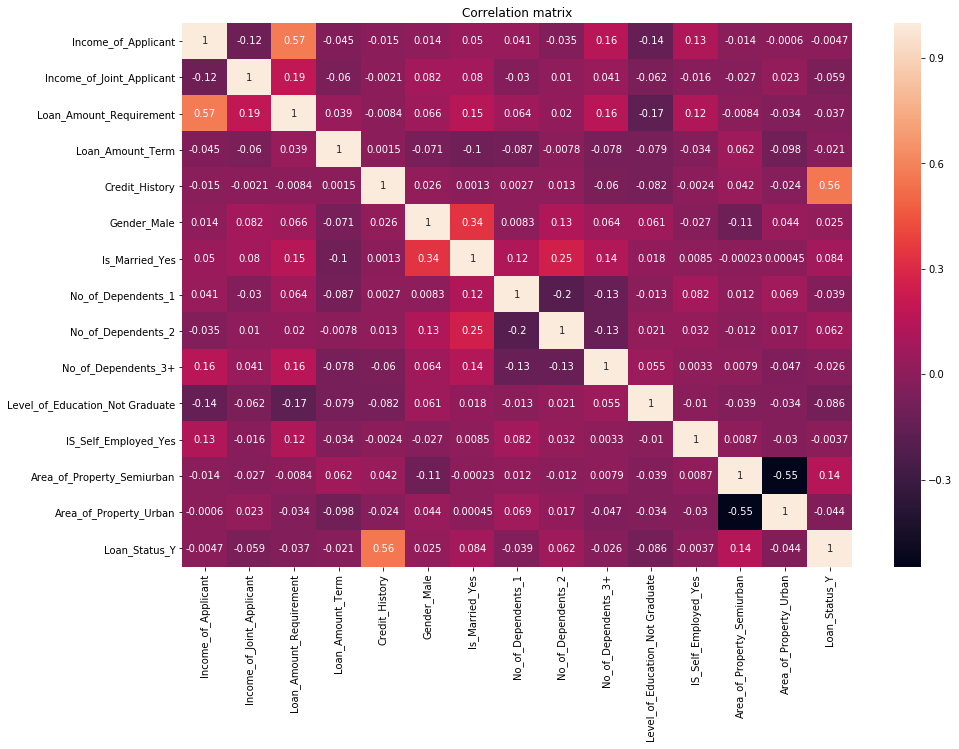

In [22]:
plt.figure(figsize=(15,10))
train_corr = train_df_encoded.corr()
ax = sns.heatmap(train_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation matrix');

#### Credit History seems most important variable with respect to our target.

## 3. Model Building 

### 1. Random Forest Classifier

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_imp,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test, y_pred))

Test Accuracy:  0.8373983739837398
classification_report
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        85

    accuracy                           0.84       123
   macro avg       0.83      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



# Explanation: 

#### There may be case when random forest will not perform better on unseen data since no learning parameter is involved and our dataset is so small, so we will be trying with XGBoost Algorithm.

### 2. XGBoost Classifier

In [26]:
!pip install xgboost

In [27]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_clf.fit(X_train_imp ,y_train, verbose=True, eval_metric=["error"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = xgb_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test, y_pred))

Test Accuracy:  0.8455284552845529
classification_report
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.85      0.94      0.89        85

    accuracy                           0.85       123
   macro avg       0.84      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123



# Explanation: 

#### Now we can see that XGBoost alogorithm is giving decent accuracy on test data. The reason behind this is the parameters like learning rate and others that involved in XGBoost. Also, Xgboost works well when the dataset is small.

## 3.Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(X_train_imp ,y_train)

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = lg_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test, y_pred))

Test Accuracy:  0.8617886178861789
classification_report
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



# Explanation:

#### We are not using Logistic Regression model even it is giving decent accuracy because this model is sensitive to outliers and our dataset contains some outliers. It may not perform well on unseen data.

## 4. Support Vector Machine

In [31]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_imp ,y_train)

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = svm_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test, y_pred))

Test Accuracy:  0.6991869918699187
classification_report
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        38
           1       0.70      1.00      0.82        85

    accuracy                           0.70       123
   macro avg       0.85      0.51      0.44       123
weighted avg       0.79      0.70      0.58       123



# Explanation:

#### We are not using Support Vector Machine model because this model is not performing well on validation data.

## 4. Model Optimization with HyperparameterTuning

### 1. Randomized Search CV

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [2,4,5,6,7]
# Minimum number of samples required to split a node
min_samples_split = [2,3, 4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [34]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=42,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_imp,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:   14.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.6s finished
C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [35]:
rf_randomcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini'}

In [36]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rf_clf_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_clf_tuned.fit(X_train_imp,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred_tuned = rf_clf_tuned.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred_tuned))
print('Classification Report')
print(classification_report(y_test, y_pred_tuned))

Test Accuracy:  0.8536585365853658
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



# Hyperparameter tuning on XGBoost

In [39]:
params = {'n_estimators': [50,100,150,200],
          'max_depth': [2,3,4,5,6,7,8],
          'learning_rate':[0.01,0.1,0.02,0.2,0.3],
          'min_child_weight': [4,6,8,10,12],
          'gamma': [i/10 for i in range(0,5)],
          'objective':['binary:logistic']}
print(params)

{'n_estimators': [50, 100, 150, 200], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'learning_rate': [0.01, 0.1, 0.02, 0.2, 0.3], 'min_child_weight': [4, 6, 8, 10, 12], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'objective': ['binary:logistic']}


In [40]:
xgb = xgb.XGBClassifier()
xgb_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=100,cv=5,verbose=2,
                               random_state=42,n_jobs=-1)
### fit the randomized model
xgb_randomcv.fit(X_train_imp,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           verbosity=None),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                  

In [41]:
xgb_randomcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgb_randomcv.best_params_

{'objective': 'binary:logistic',
 'n_estimators': 50,
 'min_child_weight': 10,
 'max_depth': 8,
 'learning_rate': 0.01,
 'gamma': 0.3}

In [43]:
import xgboost as xgb
xgb_clf_tuned = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=4,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf_tuned.fit(X_train_imp ,y_train,verbose=True, eval_metric=["error"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.5,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred_tuned = xgb_clf_tuned.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred_tuned))
print('Classification Report')
print(classification_report(y_test, y_pred_tuned))

Test Accuracy:  0.8536585365853658
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



### We have tuned our both the models which are Random Forest and Xgboost and after fine tuning using Randomized Search CV both the models gives approximately the same accuracy. But, we are preferring Xgboost over Random Forest as the dataset is small and it learn the properties of the data very well.



# Accuracy after fine tuning - 85.36%






### Final Predictions using Xgboost Classifier on Test Data

In [45]:
pred = xgb_clf.predict(test_imp)
submissions = pd.DataFrame(pred, columns=['Loan_Status'])
submissions['ID'] = test['ID']
submissions = submissions[['ID', 'Loan_Status']]
submissions['Loan_Status'] = submissions['Loan_Status'].replace({1: 'Y', 0: 'N'})

In [46]:
submissions.head()

,ID,Loan_Status
0,1,Y
1,2,Y
2,3,Y
3,4,Y
4,5,Y


In [47]:
submissions.to_csv('submissions.csv', index=False) 